In [1]:
import os
import json
import h5py
import numpy as np

import robomimic
import robomimic.utils.file_utils as FileUtils
import robomimic.utils.env_utils as EnvUtils
import robomimic.utils.obs_utils as ObsUtils
import imageio
import tqdm
from robomimic.utils.file_utils import create_hdf5_filter_key
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import plotly.graph_objects as go
import numpy as np

In [2]:
# dataset_path = "/home/ns/collect_robomimic_demos/can_data_all/can_carl_mix_v3_510.hdf5"
dataset_path = "/home/ns/collect_robomimic_demos/Lift_data_all/lift_carl_mix_v3_340.hdf5"

f = h5py.File(dataset_path, "r")
demos = list(f["data"].keys())

demos_i=[ b.decode('utf-8') for b in f['mask']['intentional']]
demos_bh=[ b.decode('utf-8') for b in f['mask']['bad_hover']]
demos_bt=[ b.decode('utf-8') for b in f['mask']['bad_touch']]
demos_o=[ b.decode('utf-8') for b in f['mask']['other_task']]
demos_tg=[ b.decode('utf-8') for b in f['mask']['try_good']]
demos_g=[ b.decode('utf-8') for b in f['mask']['good']]

In [6]:
demo_name=demos[0]
demo_name=demos[10]

obs_ee=f['data'][demos[0]]['obs']['robot0_eef_pos']
obs_ee = np.array(obs_ee)[:, :3]

x,y,z = obs_ee[:,0], obs_ee[:,1], obs_ee[:,2]
np.min(obs_ee, axis=0), np.max(obs_ee, axis=0)

(array([-0.02825145, -0.24471061,  0.85481403]),
 array([0.25431943, 0.42326195, 1.07512079]))

In [3]:
def plot_3d(demo_name, ax, c=None):
    obs_ee=f['data'][demo_name]['obs']['robot0_eef_pos']
    ees = np.array(obs_ee)[:, :3]
    x,y,z = ees[:,0], ees[:,1], ees[:,2]

    if c is None:
        ax.plot3D(x, y, z )
    else:
        ax.plot3D(x, y, z , c=c)
    # ax.scatter3D(x, y, z);
    ax.scatter3D(x[0], y[0], z[0], c='b')
    ax.scatter3D(x[-1], y[-1], z[-1], c='r')

    #set axis limit

    # ax.set_xlim3d(mins[0], maxs[0])
    # ax.set_ylim3d(mins[1], maxs[1])
    # ax.set_zlim3d(mins[2], maxs[2])

In [4]:
demo_name = demos[30]
obs_ee=f['data'][demo_name]['obs']['robot0_eef_pos']
ees = np.array(obs_ee)[:, :3]
x,y,z = ees[:,0], ees[:,1], ees[:,2]

mins=np.min(ees, axis=0)
maxs=np.max(ees, axis=0)

mins, maxs, np.min(ees), np.max(ees)

(array([-0.04753899, -0.25146052,  0.84017741]),
 array([0.19108748, 0.39207224, 1.14370745]),
 -0.2514605196013759,
 1.1437074527794588)

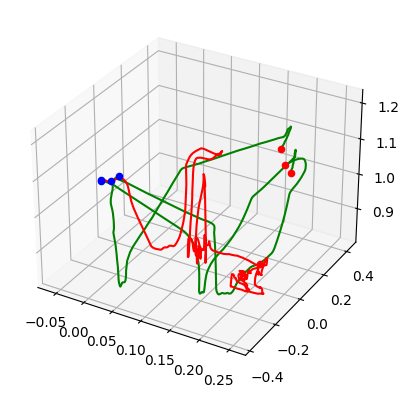

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')

plot_3d('demo_1' ,ax, c='g')
plot_3d('demo_10',ax, c='g')
plot_3d('demo_20',ax, c='g')

# plot_3d(demos_i[0],ax, c='r')
plot_3d(demos_i[10],ax, c='r')

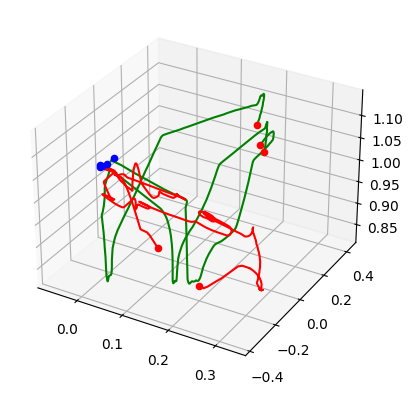

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')

plot_3d('demo_1' ,ax, c='g')
plot_3d('demo_10',ax, c='g')
plot_3d('demo_20',ax, c='g')
 
plot_3d(demos_bh[10],ax, c='r')
plot_3d(demos_bh[15],ax, c='r')

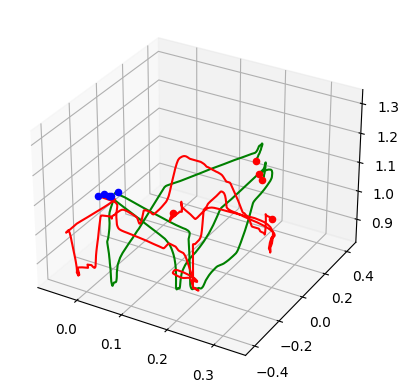

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')

plot_3d('demo_1' ,ax, c='g')
plot_3d('demo_10',ax, c='g')
plot_3d('demo_20',ax, c='g')
 
plot_3d(demos_bt[10],ax, c='r')
plot_3d(demos_bt[12],ax, c='r')

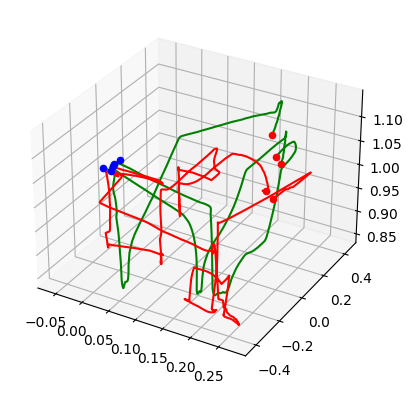

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')

plot_3d('demo_1' ,ax, c='g')
plot_3d('demo_10',ax, c='g')
plot_3d('demo_20',ax, c='g')
 
plot_3d(demos_tg[10],ax, c='r')
plot_3d(demos_tg[15],ax, c='r')

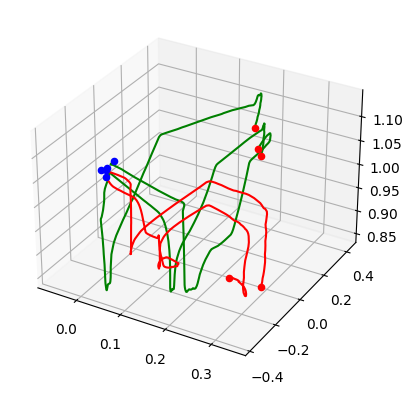

In [9]:
fig = plt.figure()
ax = plt.axes(projection='3d')
# plt.axis('off')  

plot_3d('demo_1' ,ax, c='g')
plot_3d('demo_10',ax, c='g')
plot_3d('demo_20',ax, c='g')
 
plot_3d(demos_o[10],ax, c='r')
plot_3d(demos_o[15],ax, c='r')

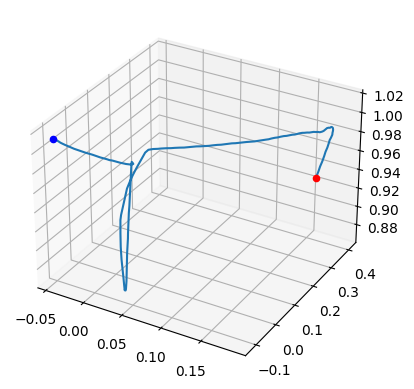

In [10]:
demo_name='demo_25'
obs_ee=f['data'][demo_name]['obs']['robot0_eef_pos']
ees = np.array(obs_ee)[:, :3]
x,y,z = ees[:,0], ees[:,1], ees[:,2]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(x, y, z )
ax.scatter3D(x[0], y[0], z[0], c='b')
ax.scatter3D(x[-1], y[-1], z[-1], c='r')

plt.show()

In [12]:
dmax=np.max( maxs-mins)
dmax

0.6435327641303165

In [19]:
def plot3d(demo_name):
    # demo_names=['demo_10', 'demo_50'] 
    demo_names=['demo_70', 'demo_20'] 
    # demo_names_bad=[demos_bh[0], demos_bt[0], demos_i[10], demos_o[0]]
    demo_names_bad=[demos_bh[0], demos_bt[10],   demos_o[10]]
    # demo_names_bad=[demos_bh[0], demos_i[10], demos_o[0]]
    
    obs_ee=f['data'][demo_name]['obs']['robot0_eef_pos']
    ees = np.array(obs_ee)[:, :3]
    x,y,z = ees[:,0], ees[:,1], ees[:,2]
    mins=np.min(ees, axis=0)
    maxs=np.max(ees, axis=0)
    dmax=np.max( maxs-mins)

    marker_size=3

    fig = go.Figure(data=[go.Scatter3d(x=x-mins[0], y=y-mins[1], z=z-mins[2],
                                        mode='lines', line=dict(color='green', width=6), marker=dict(size=marker_size))])
    
    # plot start and end points
    fig.add_trace(go.Scatter3d(x=[x[0]-mins[0]], y=[y[0]-mins[1]], z=[z[0]-mins[2]],
                                            mode='markers', marker=dict(color='blue', size=marker_size+3)))
    fig.add_trace(go.Scatter3d(x=[x[-1]-mins[0]], y=[y[-1]-mins[1]], z=[z[-1]-mins[2]],
                                            mode='markers', marker=dict(color='green', size=marker_size+3)))

    for demo_name in demo_names:
        obs_ee=f['data'][demo_name]['obs']['robot0_eef_pos']
        ees = np.array(obs_ee)[:, :3]
        x,y,z = ees[:,0], ees[:,1], ees[:,2]

        fig.add_trace(go.Scatter3d(x=x-mins[0], y=y-mins[1], z=z-mins[2],
                                        mode='lines', line=dict(color='green', width=6),  marker=dict(size=marker_size)))
        # plot start and end points
        fig.add_trace(go.Scatter3d(x=[x[0]-mins[0]], y=[y[0]-mins[1]], z=[z[0]-mins[2]],
                                                mode='markers',  marker=dict(color='blue', size=marker_size+3)))
        fig.add_trace(go.Scatter3d(x=[x[-1]-mins[0]], y=[y[-1]-mins[1]], z=[z[-1]-mins[2]],
                                                mode='markers', marker=dict(color='green', size=marker_size+3)))
    
    for demo_name in demo_names_bad:
        obs_ee=f['data'][demo_name]['obs']['robot0_eef_pos']
        ees = np.array(obs_ee)[:, :3]
        x,y,z = ees[:,0], ees[:,1], ees[:,2]

        fig.add_trace(go.Scatter3d(x=x-mins[0], y=y-mins[1], z=z-mins[2],
                                        mode='lines', line=dict(color='red', width=6),  marker=dict(size=marker_size)))
        # plot start and end points
        fig.add_trace(go.Scatter3d(x=[x[0]-mins[0]], y=[y[0]-mins[1]], z=[z[0]-mins[2]],
                                                mode='markers',  marker=dict(color='blue', size=marker_size+3)))
        fig.add_trace(go.Scatter3d(x=[x[-1]-mins[0]], y=[y[-1]-mins[1]], z=[z[-1]-mins[2]],
                                                mode='markers', marker=dict(color='green', size=marker_size+3)))

    offset=0.5
    x_lim=dict(range=[-offset, dmax+offset])
    y_lim=dict(range=[-offset, dmax+offset])
    z_lim=dict(range=[-offset, dmax+offset])

    
    
    fig.update_layout(
        scene = dict(
            xaxis = dict(visible=False),
            yaxis = dict(visible=False),
            zaxis =dict(visible=False)
            )
        )
  
    fig.update_layout(
        {
            "showlegend": False,
            "paper_bgcolor": "rgba(0, 0, 0, 0)",
            "plot_bgcolor": "rgba(0, 0, 0, 0)",
        }
    )

    fig.show() 
    # fig.write_image(f"tmp.png")

In [20]:
fig=plot3d('demo_1') 

In [3]:
def save_as_3d_traj(ees, fullpath, width=800, height=800): 
    x,y,z = ees[:,0], ees[:,1], ees[:,2]
    mins=np.min(ees, axis=0)
    maxs=np.max(ees, axis=0)
    dmax=np.max( maxs-mins)

    fig = go.Figure(data=[go.Scatter3d(x=x-mins[0], y=y-mins[1], z=z-mins[2],
                                          mode='markers')])
    # plot start and end points
    fig.add_trace(go.Scatter3d(x=[x[0]-mins[0]], y=[y[0]-mins[1]], z=[z[0]-mins[2]],
                                            mode='markers', marker=dict(color='green', size=10)))
    fig.add_trace(go.Scatter3d(x=[x[-1]-mins[0]], y=[y[-1]-mins[1]], z=[z[-1]-mins[2]],
                                            mode='markers', marker=dict(color='red', size=10)))
 

    offset=0.1
    x_lim=dict(range=[-offset, dmax+offset])
    y_lim=dict(range=[-offset, dmax+offset])
    z_lim=dict(range=[-offset, dmax+offset])

    fig.update_layout(
                scene=dict(xaxis=x_lim, yaxis=y_lim, zaxis=z_lim),
                      margin=dict(l=0, r=0, b=0, t=0),
                width=width, 
                height=height 
        )
    fig.write_image(f"{fullpath}")

In [4]:
savedir="/home/ns/collect_robomimic_demos/plots_lift" 
if not os.path.exists(savedir):
    os.makedirs(savedir)

for demo_name in tqdm.tqdm(demos):
    obs_ee=f['data'][demo_name]['obs']['robot0_eef_pos']
    ees = np.array(obs_ee)[:, :3]
    save_as_3d_traj(ees, f"{savedir}/{demo_name}.png")

  0%|          | 0/340 [00:00<?, ?it/s]

100%|██████████| 340/340 [10:43<00:00,  1.89s/it]
